### 2400 device

2400 device는 drain/source voltage를 인가하고, 이에 따른 transistor device에 흐르는 전류를 측정한다.

In [ ]:
test = "1e-3"

print(f"test = {test}")

KEITHLEY INSTRUMENTS INC.,MODEL 2420,4051227,C32   Oct  4 2010 14:20:11/A02  /J/L

[-6.410095e-12, -8.58813e-13, -1.499023e-11, -5.401402e-12, -8.933743e-12, -1.362688e-12, -1.095291e-11, -8.934353e-12, -1.297151e-11, -5.905942e-12, 1.664946e-12, -4.896139e-12, -1.246658e-11, -1.297157e-11, -2.155193e-11, 1.125444e-11, -9.438117e-12, -1.650452e-11, -1.297151e-11, -1.398137e-11, -5.90622e-12, 6.206924e-12, -1.297124e-11, -2.659806e-11, -2.357053e-11, -1.246631e-11, -3.887002e-12, -2.155148e-11, -1.246675e-11, -8.429535e-12, -2.256084e-11, -2.877365e-12, -1.599987e-11, -2.357042e-11, -3.467371e-11, -2.912171e-11, 5.364909e-11, -1.363243e-12, -8.428924e-12, -1.246675e-11, -1.36352e-12, 2.286249e-11, 2.387168e-11, -1.145756e-11, -1.145761e-11, -9.438283e-12, -8.590351e-13, -5.400735e-12, -9.438395e-12, -1.448536e-11, -2.373102e-12, -9.943157e-12, -9.942991e-12, -1.3476e-11, -2.962697e-11, -1.145734e-11, 4.693246e-12, 6.553647e-13, -8.934298e-12, 1.159683e-12, -1.902795e-11, -2.372325e-12, 

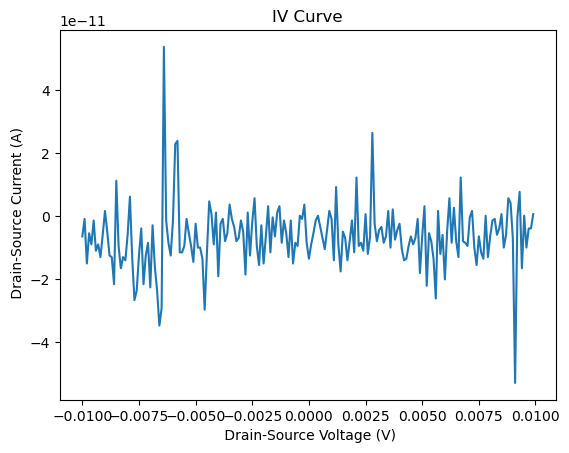

In [12]:
import pyvisa
import time

rm = pyvisa.ResourceManager()
Keithley = rm.open_resource('GPIB0::24::INSTR')

# DeviceID
print(Keithley.query('*IDN?'))

startv = "-0.01"
stopv = "0.01"
stepv ="0.0001"
steps= "201"
startvprime = float(startv)
stopvprime = float(stopv)
stepvprime = float(stepv)
steps = (stopvprime - startvprime) / stepvprime 

# Turn off concurrent functions and set sensor to current with fixed voltage
Keithley.write(":SENS:FUNC:CONC OFF")
Keithley.write(":SOUR:FUNC VOLT")
Keithley.write(":SENS:FUNC 'CURR:DC' ")

# Voltage starting, ending, and spacing values based on input
Keithley.write(":SOUR:VOLT:STAR ", startv)
Keithley.write(":SOUR:VOLT:STOP ", stopv)
Keithley.write(":SOUR:VOLT:STEP ", stepv)
Keithley.write(":SOUR:SWE:RANG AUTO")

# Set compliance current (in A), sweep direction, and data acquisition
Keithley.write(":SENS:CURR:PROT 0.1")
Keithley.write(":SOUR:SWE:SPAC LIN")
Keithley.write(":SOUR:VOLT:DEL 0.5")
Keithley.write(":SOUR:SWE:POIN ", str(int(steps)))
Keithley.write(":SOUR:SWE:DIR UP")
Keithley.write(":TRIG:COUN ", str(int(steps)))
Keithley.write(":FORM:ELEM CURR")

# Set sweep mode and turn output on
Keithley.write(":SOUR:VOLT:MODE SWE")
Keithley.write(":OUTP ON")

# Initiate sweep, collect ACSII current values, and turn output off
result = Keithley.query(":READ?")
yvalues = Keithley.query_ascii_values(":FETC?")
#data = Keithley.query('TRAC:DATA? 1,1') 

print(yvalues)
print(result)
Keithley.write(":OUTP OFF")
Keithley.write(":SOUR:VOLT 0")

# Import Pyplot, NumPy, and SciPy
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Create xvalues array and calculate conductance
xvalues = np.arange(startvprime,stopvprime,stepvprime)
slope, intercept, r_value, p_value, std_error = stats.linregress(xvalues, yvalues)

# Plot values and output conductance to command line
print("Conductance:", slope, "Siemens")
plt.plot(xvalues,yvalues)
plt.xlabel(' Drain-Source Voltage (V)')
plt.ylabel(' Drain-Source Current (A)')
plt.title('IV Curve')
plt.show()
np.savetxt("test", (xvalues,yvalues)) 